# **Project Data Mining Prediksi Stroke Dengan Algoritma Random Forest**

**Nama  : Rizal Nawang Pradana**

**NIM   :  C2C020012**

Dataset bisa anda lihat [disini](https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=stroke_data.csv)

# ***Import Library Yang Akan digunakan untuk EDA***



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                             #visualisation
import matplotlib.pyplot as plt                   #visualisation
from sklearn.preprocessing import MinMaxScaler    #Normalisasi
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Import Dataset Yang Akan digunakan***

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data Mining/Project/stroke_data.csv")
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [4]:
df.tail()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
40905,1.0,38.0,0,0,0,4,1,120.94,29.7,1,0
40906,0.0,53.0,0,0,1,4,0,77.66,40.8,0,0
40907,1.0,32.0,0,0,1,2,0,231.95,33.2,0,0
40908,1.0,42.0,0,0,1,3,0,216.38,34.5,0,0
40909,1.0,35.0,0,0,0,4,0,95.01,28.0,0,0


# ***Cek tipe data setiap atribut atau fitur***

In [5]:
df.dtypes

sex                  float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

# ***Mengganti Nama Atribut Agar Mudah Dibaca***

*Dalam hal ini, sebagian besar nama fitur atau atribut sangat membingungkan untuk dibaca, jadi saya hanya mengubah nama kolomnya. Ini adalah pendekatan yang baik karena meningkatkan keterbacaan kumpulan data.*

In [6]:
df = df.rename(columns={"sex": "Jenis_Kelamin", "age": "Umur", "hypertension": "Hipertensi", "heart_disease": "Sakit_Jantung","ever_married": "Menikah", "work_type": "Tipe_Pekerjaan", "Residence_type": "Area", "avg_glucose_level" : "Rata-Rata_Gula-Darah", "bmi" : "Berat_Badan" ,"smoking_status" : "Merokok" })
df.head(5)

,Jenis_Kelamin,Umur,Hipertensi,Sakit_Jantung,Menikah,Tipe_Pekerjaan,Area,Rata-Rata_Gula-Darah,Berat_Badan,Merokok,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


***Penjelasan Fitur Tipe pekerjaan***


*0.   Tidak pernah_bekerja*

*1.   anak-anak*

*2.   Pekerjaan_Pemerintah*

*3.   Wiraswasta*

*4.   Swasta*



# ***Menganalisis Korelasi / Hubungan Antara Fitur***

*Heat Maps adalah jenis plot yang diperlukan saat kita perlu menemukan variabel dependen. Salah satu cara terbaik untuk menemukan hubungan antar fitur dapat dilakukan dengan menggunakan Heat Maps. Pada Heat Maps di bawah ini kita tahu bahwa fitur Rata-Rata_Gula-Darah korelasi pada Sakit_Jantung, Berat_Badan, dan Hipertensi.*

,Jenis_Kelamin,Umur,Hipertensi,Sakit_Jantung,Menikah,Tipe_Pekerjaan,Area,Rata-Rata_Gula-Darah,Berat_Badan,Merokok,stroke
Jenis_Kelamin,1.000000,-0.115259,-0.039178,-0.045350,-0.025981,0.003121,0.003715,-0.039357,-0.006016,-0.027994,-0.111036
Umur,-0.115259,1.000000,0.014365,0.024541,0.006294,0.003647,0.002686,0.027271,-0.012323,-0.002070,0.058534
Hipertensi,-0.039178,0.014365,1.000000,0.079968,0.033760,-0.033133,-0.002651,0.203502,0.082386,-0.017813,0.257182
Sakit_Jantung,-0.045350,0.024541,0.079968,1.000000,0.071596,0.049382,0.013000,0.252034,0.021374,0.137279,0.223930
Menikah,-0.025981,0.006294,0.033760,0.071596,1.000000,0.051596,-0.057161,0.160268,0.113667,0.137516,0.181656
Tipe_Pekerjaan,0.003121,0.003647,-0.033133,0.049382,0.051596,1.000000,-0.011294,0.018167,0.074723,0.052938,0.026494
Area,0.003715,0.002686,-0.002651,0.013000,-0.057161,-0.011294,1.000000,0.016431,0.037169,0.017704,0.011682
Rata-Rata_Gula-Darah,-0.039357,0.027271,0.203502,0.252034,0.160268,0.018167,0.016431,1.000000,0.242823,0.056832,0.265452
Berat_Badan,-0.006016,-0.012323,0.082386,0.021374,0.113667,0.074723,0.037169,0.242823,1.000000,0.042448,0.018326
Merokok,-0.027994,-0.002070,-0.017813,0.137279,0.137516,0.052938,0.017704,0.056832,0.042448,1.000000,0.068368


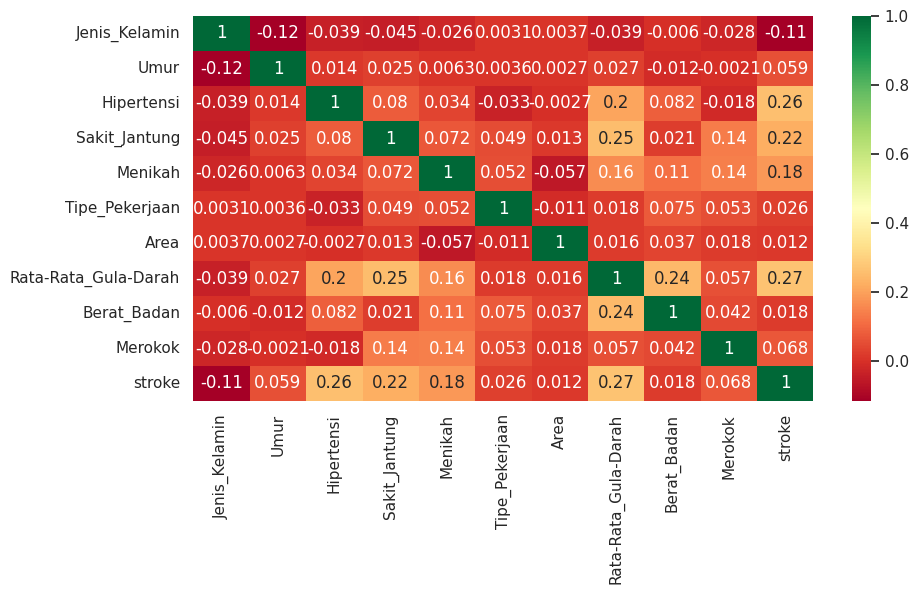

In [7]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="RdYlGn",annot=True)
c

# ***Menghapus Fitur Yang Memiliki Fitur / Korelasi Yang Rendah***

*Langkah ini memang diperlukan dalam setiap Exploratory Data Analisis (EDA) karena terkadang ada banyak kolom yang tidak perlu digunakan, dan dalam kasus seperti itu, menghapus adalah satu-satunya solusi.*

In [8]:
# df = df.drop([''], axis=1) #Untuk Menghapus Fitur

# ***Menghapus Missing Value***

*di sini semua Missing Value terdeteksi dan kemudian dihapus. Namun, ini bukan cara yang baik untuk dilakukan, karena banyak orang hanya menggantikan Missing Value dengan rata-rata atau nilai tengah dari fitur tersebut, tetapi dalam kasus ini, saya hanya missing value tersebut. Hal ini dikarenakan terdapat hanya 3 nilai yang hilang dibandingkan dengan 40.000 lebih nilai, jumlah ini relatif kecil dan dapat diabaikan, sehingga saya memilih untuk menghapus nilai-nilai tersebut.*

In [9]:
print(df.isnull().sum())

Jenis_Kelamin           3
Umur                    0
Hipertensi              0
Sakit_Jantung           0
Menikah                 0
Tipe_Pekerjaan          0
Area                    0
Rata-Rata_Gula-Darah    0
Berat_Badan             0
Merokok                 0
stroke                  0
dtype: int64


*Ini adalah alasan di langkah sebelumnya ketika menghitung jumlah Jenis_kelamin, terdapat 3 missing value terhitung dari total 40.910 baris data.*

In [10]:
df = df.dropna()    # Menghapus missing values.
df.count()

Jenis_Kelamin           40907
Umur                    40907
Hipertensi              40907
Sakit_Jantung           40907
Menikah                 40907
Tipe_Pekerjaan          40907
Area                    40907
Rata-Rata_Gula-Darah    40907
Berat_Badan             40907
Merokok                 40907
stroke                  40907
dtype: int64

*Sekarang kita telah menghapus semua baris yang mengandung nilai Null atau N/A Pada Jenis_Kelamin.*

# ***Menghapus Data Redundansi Atau Duplikat***

Disini kita dapat mengahpus data duplikat, tetapi pada dataset untuk data duplikat tidak ada

In [11]:
df.shape

(40907, 11)

In [12]:
duplicate_rows_df = df[df.duplicated()]
print("Jumlah Baris Duplikat ", duplicate_rows_df.shape)

Jumlah Baris Duplikat  (0, 11)


In [13]:
df.count()      # Untuk Melihat Jumlah Data Fitur

Jenis_Kelamin           40907
Umur                    40907
Hipertensi              40907
Sakit_Jantung           40907
Menikah                 40907
Tipe_Pekerjaan          40907
Area                    40907
Rata-Rata_Gula-Darah    40907
Berat_Badan             40907
Merokok                 40907
stroke                  40907
dtype: int64

In [14]:
df = df.drop_duplicates() # Untuk Menghapus Data Duplikat

# ***Mendeteksi Nilai Outlier***

*Outlier adalah titik atau set titik yang berbeda dari titik-titik lainnya. Kadang-kadang mereka bisa sangat tinggi atau sangat rendah. Seringkali merupakan ide yang baik untuk mendeteksi dan mengatasi outlier, karena outlier adalah salah satu alasan utama yang mengakibatkan model yang kurang akurat.*

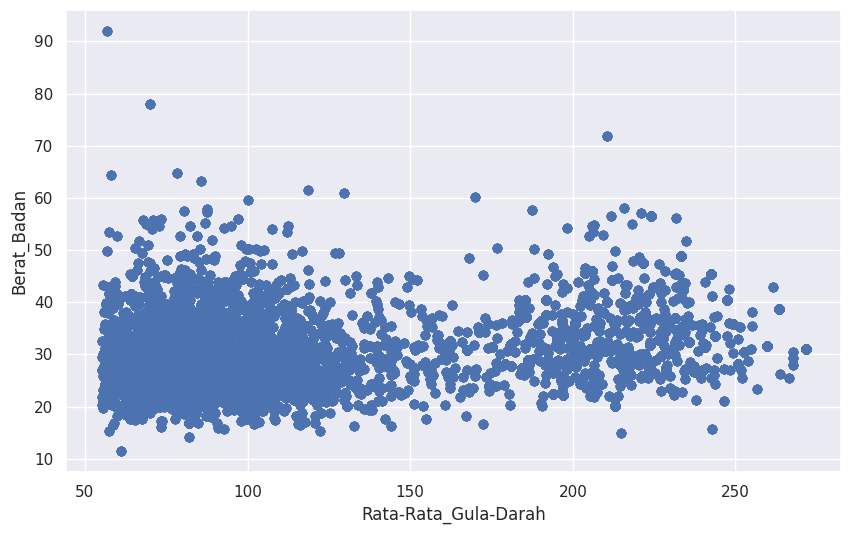

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Rata-Rata_Gula-Darah'], df['Berat_Badan'])
ax.set_xlabel('Rata-Rata_Gula-Darah')
ax.set_ylabel('Berat_Badan')
plt.show()

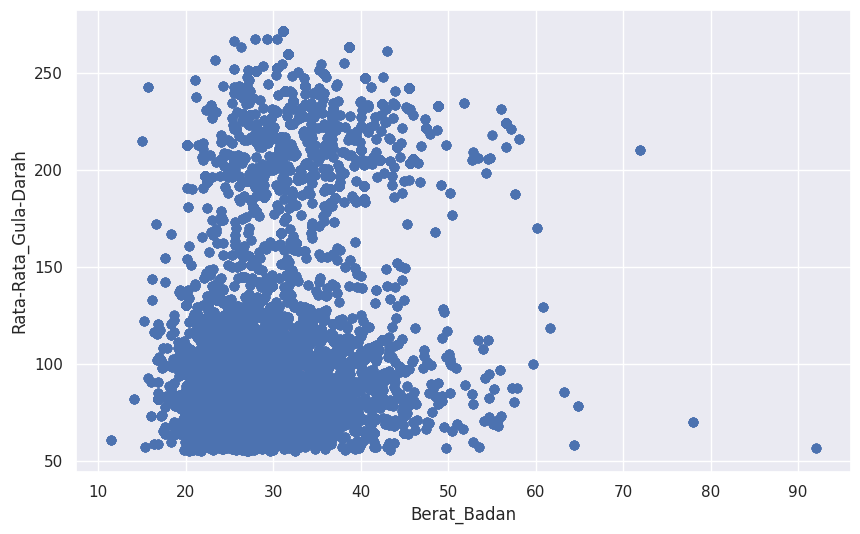

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Berat_Badan'], df['Rata-Rata_Gula-Darah'])
ax.set_xlabel('Berat_Badan')
ax.set_ylabel('Rata-Rata_Gula-Darah')
plt.show()

# ***Data Normalization***

***Memisahkan Antara Fitur Dan Label***

In [17]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, 10].values

*Data normalization adalah proses mengubah variabel-variabel dalam dataset menjadi skala yang seragam atau normal. Tujuan dari data normalization adalah untuk menghilangkan perbedaan skala antar variabel sehingga dapat meningkatkan kinerja model atau algoritma machine learning.*

*Manfaat dari data normalization :*

*Mengurangi efek outliers: Outliers atau pencilan dapat memiliki dampak yang signifikan terhadap model atau algoritma. Dengan melakukan normalisasi, outlier dapat diurangi dampaknya dan mencegahnya dari mengganggu hasil yang dihasilkan.*

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(X)

MinMaxScaler()

In [20]:
X = scaler.transform(X)

In [21]:
print(X)
print(Y)

[[1.         0.64285714 0.         ... 0.80126489 0.31180124 1.        ]
 [1.         0.45535714 0.         ... 0.23451205 0.26086957 0.        ]
 [0.         0.625      0.         ... 0.53600776 0.28447205 1.        ]
 ...
 [1.         0.36607143 0.         ... 0.81631428 0.26956522 0.        ]
 [1.         0.45535714 0.         ... 0.74443726 0.28571429 0.        ]
 [1.         0.39285714 0.         ... 0.18414735 0.20496894 0.        ]]
[1 1 1 ... 0 0 0]


# ***Mulai Melakukan Modeling***

***Import Library Yang Akan digunakan untuk Modeling***


In [22]:
from sklearn.model_selection import train_test_split   # Untuk Melakukan Split Data Training Dan Testing
from sklearn import metrics                            #
from sklearn.ensemble import RandomForestClassifier    # Algoritma Random Forest

***Memisahkan Data Training Dan Data Testing***


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

***Membuat Model***


In [24]:
model = RandomForestClassifier(criterion = "gini", n_estimators = 100)
model.fit(X_train, y_train)

RandomForestClassifier()

***Mengecek Akurasi Model Dengan Data Training***

In [25]:
x_train_pred = model.predict(X_train)

In [26]:
print("Akurasi Data Training:",metrics.accuracy_score(y_train, x_train_pred))

Akurasi Data Training: 1.0


***Mengecek Akurasi Model Dengan Data Testing***

In [27]:
x_testing_pred = model.predict(X_test)

In [28]:
print("Akurasi Data Training:",metrics.accuracy_score(y_test, x_testing_pred))

Akurasi Data Training: 0.9977185692169803


***Mengecek Akurasi Model Dengan Data Input Data Manual***

In [29]:
#Input Data Secara Manual
#input_data = (1, 42,	0,	1,	1,	4,	0,	105.92,	32.5,	0)        #True
input_data = (1.0,	35.0,	0,	0,	0,	4,	0,	95.01,	28.0,	0)    #False

#Ubah Data Ke Array
input_data_array = np.array(input_data)

#Lakukan Reshape Pada Data
input_data_reshape = input_data_array.reshape(1,-1)

#Lakukan normalisasi Pada Data
input_data_std = scaler.transform(input_data_reshape)
print(input_data_std)

#Lakukan Prediksi Pada Model
Prediction = model.predict(input_data_std)
print(Prediction)


if(Prediction[0] == 0 ) :
  print('Anda Tidak Terkena Stroke')
else :
  print('Anda Terkena Stroke')

[[1.         0.39285714 0.         0.         0.         1.
  0.         0.18414735 0.20496894 0.        ]]
[0]
Anda Tidak Terkena Stroke


# ***Menyimpan Model Yang Sudah Dibuat***

In [30]:
import pickle

In [31]:
file_name = 'Stroke_Model.sav'
pickle.dump(model, open(file_name, 'wb'))